![PNS](http://caillau.perso.math.cnrs.fr/logo-pns.png)
## MAM4 - EDP1
# TP 2 - Équation d'advection

## Exercice 1. Schéma explicite

On résout numériquement l'équation d'advection sur $\Omega:=]0,L[$ avec conditions aux limites périodiques.

$$ \left\{\begin{array}{l}
\displaystyle \frac{\partial u}{\partial t}(x,t)+V\frac{\partial
  u}{\partial x}(x,t)=0,x\in\Omega,\,t\ge 0,\\
\displaystyle u(x,0)=u_0(x),\,x\in \Omega,\\
u(0,t)=u(L,t),\,t\ge 0.
\end{array}\right. $$

Pour simplifier on a supposé que la donnée initale
est périodique de période $L$. On vérifie aisément que la
solution exacte est donnée par $u(x,t)=u_0(x-Vt)$.

On cherche à approcher numériquement la solution par le schéma *décentré amont* suivant:

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}+V\frac{u_j^n-u_{j-1}^n}{\Delta x}=0 $$ 

o\`u $u_j^n\cong u(x_j,t_n),\,0\le j\le N$, $\Delta x=L/N$,
$x_j=j\Delta x$ et $t_n = n\Delta t$. En réarrangeant les termes, on obtient

$$ u_j^{n+1}=u_j^n-\sigma(u_j^n-u_{j-1}^n) $$

o\`u $\sigma=\displaystyle\frac{V\Delta t}{\Delta x}$ est connu sous le nom de [*nombre de Courant*](https://fr.wikipedia.org/wiki/Nombre_de_Courant).
Pour approcher la condition initiale et la condition limite on écrit

$$ u_j^0=u_0(x_j),\,0\le j\le N,\, u_0^n = u_N^n,\,n\ge 0. $$

Augmenter progressivement le paramètre $\sigma$ et observer le résultat. Quelle est la valeur critique ? Constater aussi en augmentant progressivement `Nt` que la solution numérique est amortie au fil des itérations en temps (phénomène de diffusion numérique).

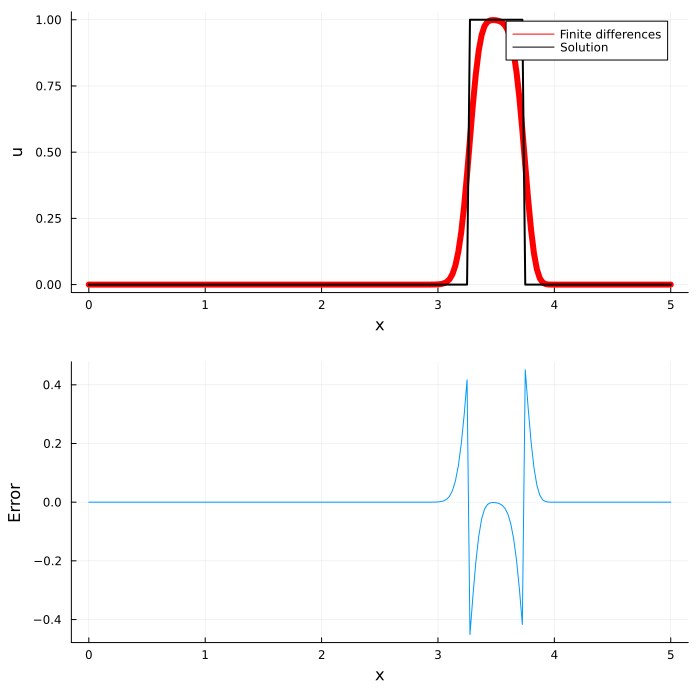

Δx: 0.025	 Δt:0.225	 max error: 0.45129025988048765


In [68]:
using LinearAlgebra, Plots
  
# Parameters
V = 0.1                                             # advection speed
L = 5                                               # domain length
Nx = 200                                            # space grid size
x = range(0, L, length = Nx+1)                      # space grid
Δx = x[2]-x[1]                                      # space stepsize
σ = 0.9                                             # Courant number
Δt = σ*Δx/V                                         # time stepsize
Nt = 100                                             # time grid size     
tf = Nt * Δt                                        # final time
condinit = x -> Float64.((x.>1.0) .& (x.<1.5))      # characteristic function
#condinit = x -> sin.(8*π*x/L)                      # sine pulse
u0 = condinit(x)                                    # initial condition

# Explicit scheme
u = u0
for n = 1:Nt
    uold = u
    u[2:end] = uold[2:end]-σ*(uold[2:end]-uold[1:end-1])
    u[1] = u[end]
end

uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

## Exercice 2. Schéma de Lax-Wendroff
En suivant le modèle précédent, implémenter le schéma suivant :

$$
u_j^{n+1}=u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n)+\frac{\sigma^2}{2}(u_{j+1}^n-2u_j^n+u_{j-1}^n).
$$

Dans ce nouveau script au tout début, à l'intérieur de la boucle en temps on va fixer la condition à un des bords (condition entrante) :

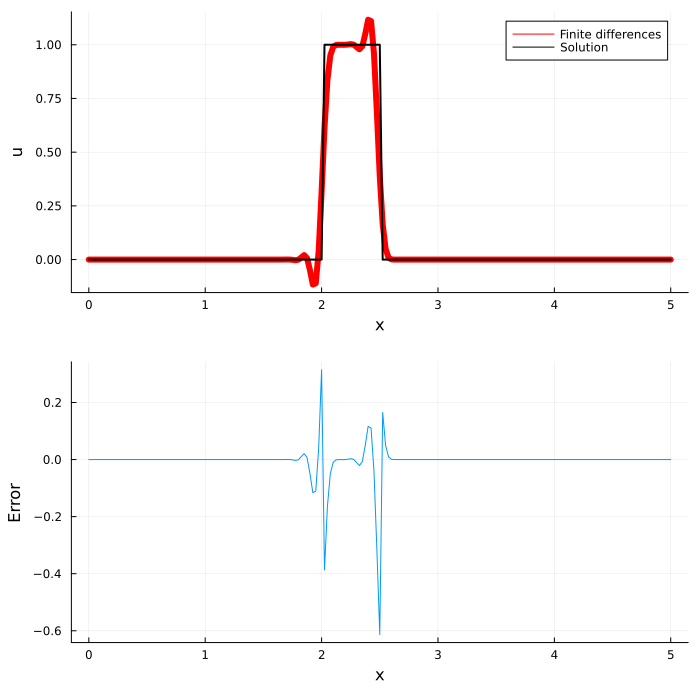

Δx: 0.025	 Δt:0.225	 max error: 0.6133205970968566


In [69]:
# Parameters
V = 0.1                                             # advection speed
L = 5                                               # domain length
Nx = 200                                            # space grid size
x = range(0, L, length = Nx+1)                      # space grid
Δx = x[2]-x[1]                                      # space stepsize
σ = 0.9                                             # Courant number
Δt = σ*Δx/V                                         # time stepsize
Nt = 45                                             # time grid size     
tf = Nt * Δt                                        # final time
condinit = x -> Float64.((x.>1.0) .& (x.<1.5))      # characteristic function
#condinit = x -> sin.(8*π*x/L)                      # sine pulse
u0 = condinit(x)                                    # initial condition

# Lax-Wendroff
u = u0
for n = 1:Nt
    uold = u
    u[2:end-1] = uold[2:end-1]-(1/2)*σ*(uold[3:end]-uold[1:end-2])+(1/2)*(σ^2)*(uold[3:end]-2*uold[2:end-1]+uold[1:end-2])
    u[1] = condinit(x[1]-V*(n)*Δt)
    u[end] = u[1]
end

uexact = condinit(x.-V*tf)
err = u - uexact
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:red, label="Finite differences", lw=6)
plot!(u_plot, x, uexact, xlabel="x", ylabel="u", color=:black, label="Solution", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="Error", legend=false)
display(plot(u_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

Repartir de $\sigma=0.8$ et essayer 4 possibilités du couple conditions initiale/schéma numérique. 

- Quelles conditions tirez-vous ?
- Augmenter progressivement $\sigma$ pour le schéma de Lax-Wendroff et observer. 
- Que peut-on dire de la diffusion numérique observée précédemment dans le cas du schéma décentré ?
- Le schéma de Lax-Wendroff est-il diffusif ?

## Q1.

Avec une condition en créneau, pour le schéma explicite, on a une coubre qui présente de la diffusion numérique, puisqu'on voit l'applatissement du créneau. Pour le schéma de Lax-Wendroff, on voit de la dispersion sur les bords du créneau, ce qui est visible pas les oscillations.

En utilisant une condition sinusoïdale, on observe un léger décalage lorsqu'on utilise les schéma explicite, alors que le schéma de Lax-Wendroff est très proche de la solution unique. L'applatissement confirme bien la diffusion numérique du schéma explicite, alors qu'on ne voit pas de dispersion dans le cas d'une fonction lisse.

## Q2.

Pour un σ petit, qui se rapproche de 0, on observe de grandes oscillations, donc beaucoup de dispersion.
Plus le σ est grand, plus la dispersion s'affaiblit, jusqu'à 1, où le schéma se confond avec la solution exacte. 
Au delà de 1, la solution explose, il n'y a que des oscillations.

## Q3.

On observe de la diffusion numérique pour le schéma explicite (exercice 1), mais cela n'est pas présent sur le schéma de Lax-Wendroff.

## Q4.

Le schéma de Lax-Wendroff n'est pas diffusif car il ne s'applati pas mais il est dispersif.

## Exercice 3. Schéma de Lax-Wendroff implicite
On va changer le schéma comme suit :

$$
u_j^{n+1}=u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n)+\frac{\sigma^2}{2}(u_{j+1}^{n+1}-2u_j^{n+1}+u_{j-1}^{n+1}).
$$ 

En introduisant $W^n = (u_j^n-\frac{\sigma}{2}(u_{j+1}^n-u_{j-1}^n))_j$ et
$U^n=(u_j^n)_j$,
le schéma s'écrit $AU^{n+1}=W^n$. On pourra utiliser la
condition de périodicité directement dans le schéma numérique afin d'éliminer $u_j^N$. On constate que le schéma est implicite : l'évaluation de $U^{n+1}$ à partir
de $U^n$ nécessite la résolution d'un système linéaire, et le coût
de l'itération sera plus élevé que dans le cas d'un
schéma explicite. Cependant le schéma n'est pas limité par la
valeur du nombre de Courant $\sigma$ ce qui permet d'utiliser des
pas de temps plus grands et donc de diminuer le nombre d'itérations associé.

Deux options sont possibles pour la boucle en temps : 
- soit résoudre le système linéaire à chaque pas de temps (factorisation, pas inversion !)
- soit factoriser la matrice $A$ une fois pour toutes avant la boucle (par exemple sous la forme $A=LU$), puis réutiliser cette factorisation.

Comparer ces différentes options pour la résolution
du systéme linéaire en observant le temps d'execution et en augmentant progressivement la taille du système à résoudre. Réaliser des expériences numériques en
faisant varier le nombre de Courant. Discuter les performances relatives des schémas implicite et explicite en termes de temps de calcul.

In [89]:
# Parameters
V = 0.1                                             # advection speed
L = 5                                               # domain length
Nx = 200                                            # space grid size
x = range(0, L, length = Nx+1)                      # space grid
Δx = x[2]-x[1]                                      # space stepsize
σ = 0.9                                             # Courant number
Δt = σ*Δx/V                                         # time stepsize
Nt = 45                                             # time grid size     
tf = Nt * Δt                                        # final time
condinit = x -> Float64.((x.>1.0) .& (x.<1.5))      # characteristic function
#condinit = x -> sin.(8*π*x/L)                      # sine pulse
u0 = condinit(x)                                    # initial condition

return 0

0

In [90]:
# Lax Wendroff implicite

# Definition de A
A=zeros(Nx+1,Nx+1)
A[1,1]=1+σ^2
A[1,end]=-σ^2/2
A[1,2]=-σ^2/2
for i=2:Nx
    A[i,i-1]=-σ^2/2
    A[i,i]=1+σ^2
    A[i,i+1]=-σ^2/2
end
A[end,end-1]=-σ^2/2
A[end,end]=1+σ^2
A[end,1]=-σ^2/2


-0.405

### METHODE 1

Consiste à résoudre le système linéaire à chaque pas de temps. 

In [91]:
#Definition de W
w = u0

for n = 1:Nt
    uold = u
    w[2:end-1] = uold[2:end-1] - σ/2*(uold[3:end] - uold[1:end-2])
    w[1] = condinit(x[1] - V*n*Δt)
    w[end] = w[1]
    u = A\w
end

### METHODE 2

Consiste à factoriser la matrice A une fois pour toute avant la boucle

In [92]:
#Definition de W
w = u0
u = A\w

for n = 1:Nt
    uold = u
    w[2:end-1] = uold[2:end-1] - σ/2*(uold[3:end] - uold[1:end-2])
    w[1] = condinit(x[1] - V*n*Δt)
    w[end] = w[1]
end

### CONCLUSION

La methode 1 utilise un algorythme de complexité $n^3$ à chaque itération (résolution de Gauss)  tandis que pour la méthode 2, on réalise une fois cette étape de complexité $n^3$ puis à chaque itération on réalise une remonté de complexité $n^2$. La seconde méthode est donc moins demandante.

Pour montrer cette différence, il faudrait afficher le temps d'excecussion des 2 méthodes. 